In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

## Simple Linear Regression

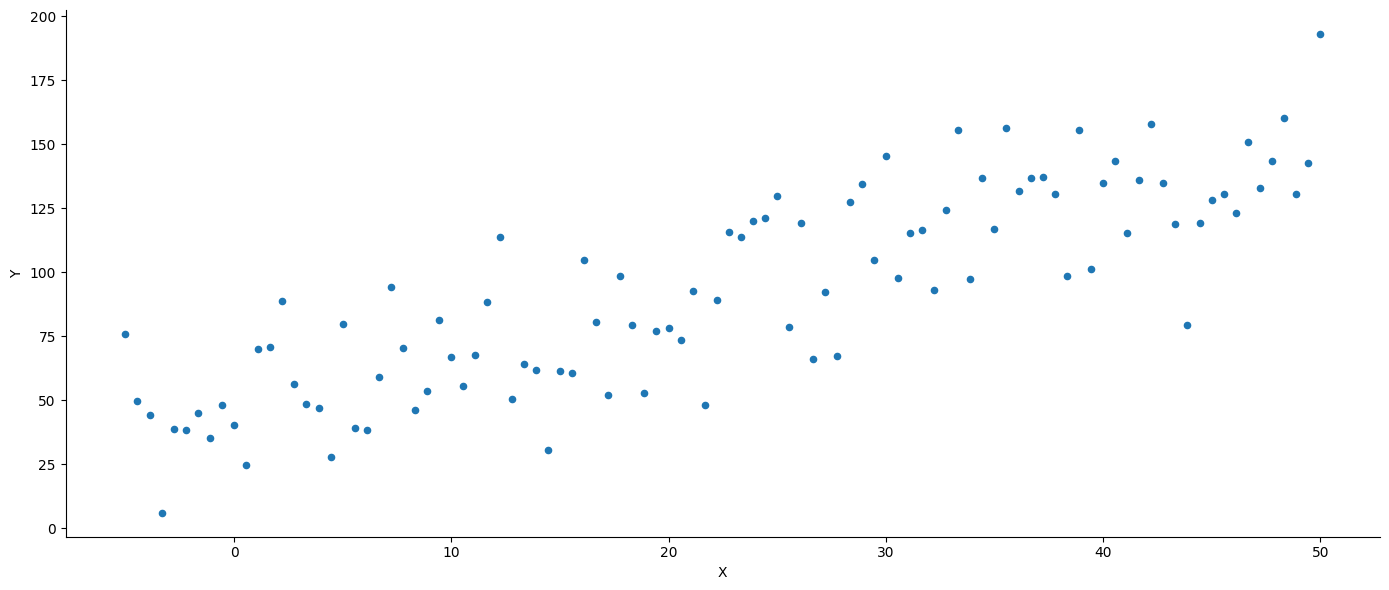

In [3]:
np.random.seed(3)
X = np.linspace(-5, 50, 100)
y = 50 + 2 * X + np.random.normal(0, 20, size=len(X))
data = pd.DataFrame({'X': X, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()

plt.tight_layout()

Our linear model with a single independent variable on the left-hand side assumes the following form:

$$y_{t} = \beta_0 + \beta_1 X_1 + \epsilon_{t}$$

$\epsilon_{t}$ accounts for the deviations or errors that we will encounter when our data do not actually fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called **residuals**.

In [4]:
from sklearn.linear_model import LinearRegression
skmodel = LinearRegression()

#fit regression model
reg = skmodel.fit(X.reshape(-1, 1), y)

#get estimated intercepts and coefficients
print('intercept: ', reg.intercept_)
print('coefficients: ', reg.coef_)

intercept:  46.61980512076696
coefficients:  [2.0536646]


In [5]:
X = sm.add_constant(data['X'])
statsmodel = sm.OLS(data['Y'], X).fit()
print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     235.1
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           8.75e-28
Time:                        23:26:25   Log-Likelihood:                -447.59
No. Observations:                 100   AIC:                             899.2
Df Residuals:                      98   BIC:                             904.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.6198      3.701     12.598      0.0

Visualize the estimated line of best fit on the simulated data. Here y-hat denote the points that form the estimated line of best fit (blue line).

<Axes: xlabel='X', ylabel='Y'>

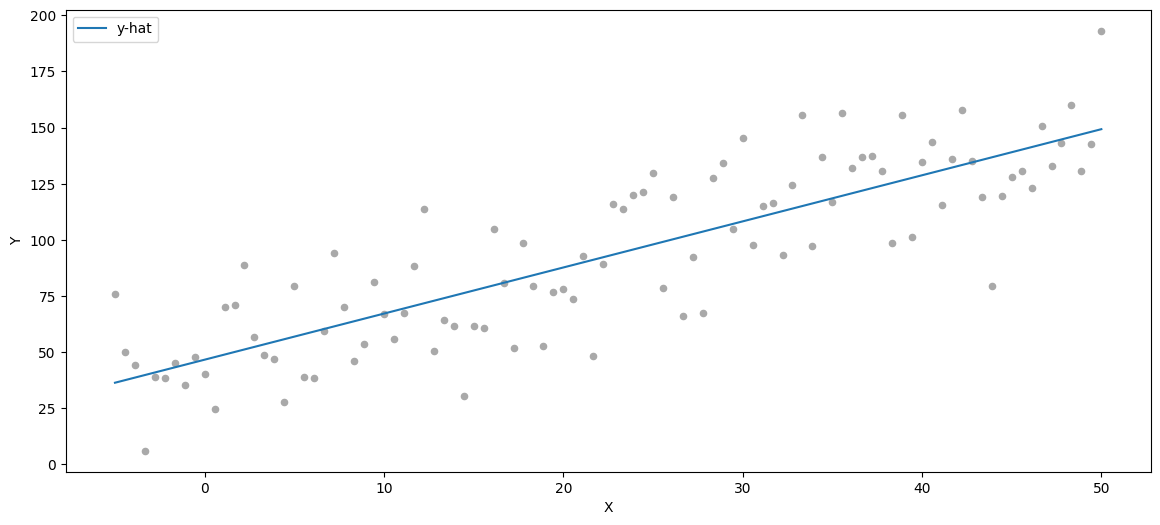

In [6]:
data['y-hat'] = statsmodel.predict() # predicted values
data['residuals'] = statsmodel.resid # redisuals/ errors
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6)) # visualize scatter
data.plot.line(x='X', y='y-hat', ax=ax) # visualize estimated line of best fit

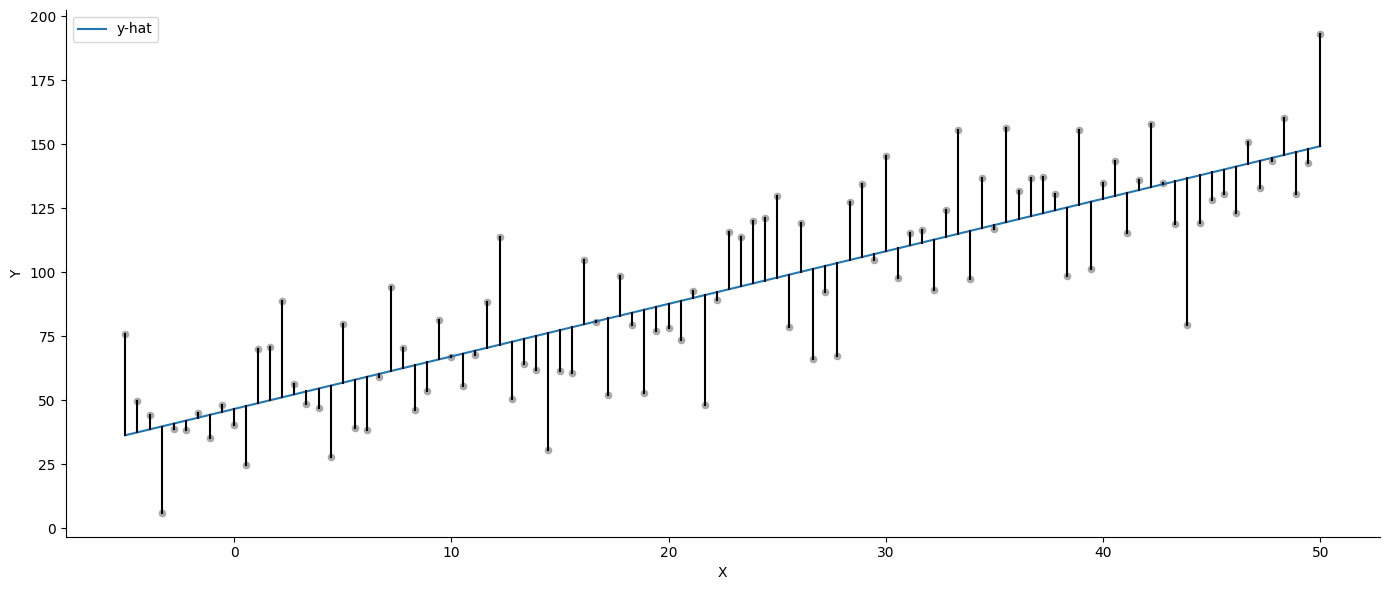

In [6]:
data['y-hat'] = statsmodel.predict() # predicted values
data['residuals'] = statsmodel.resid # redisuals/ errors
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6)) # visualize scatter
data.plot.line(x='X', y='y-hat', ax=ax) # visualize estimated line of best fit

for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    
sns.despine()
plt.tight_layout();

## Multiple Linear Regression

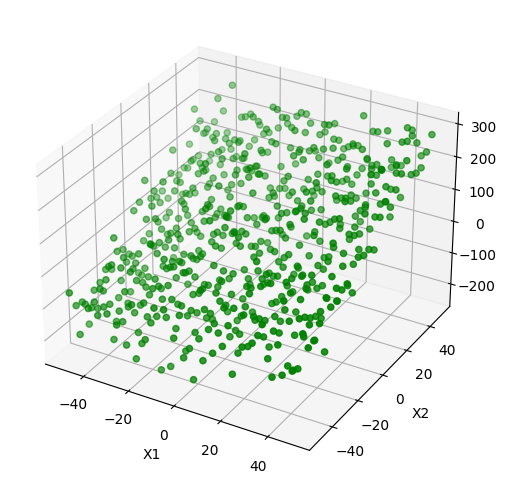

In [7]:
np.random.seed(3)
## Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## Plot 3D
three_dee = plt.figure(figsize=(15, 5)).add_subplot(projection = '3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
three_dee.set_xlabel("X1")
three_dee.set_ylabel("X2")
three_dee.set_zlabel("Y")

sns.despine()
plt.tight_layout();

For two independent variables, the model simply changes as follows:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

In [8]:
X = data[['X_1', 'X_2']]
y = data['Y']

In [9]:
skmodel = LinearRegression()

#fit regression model
reg = skmodel.fit(X, y)

#get estimated intercepts and coefficients
print('intercept: ', reg.intercept_)
print('coefficients: ', reg.coef_)

intercept:  51.05330755502459
coefficients:  [1.06431721 3.04737559]


In [10]:
X_ols = sm.add_constant(X)
statsmodel = sm.OLS(y, X_ols).fit()
print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1136.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):          2.17e-208
Time:                        08:28:58   Log-Likelihood:                -3341.1
No. Observations:                 625   AIC:                             6688.
Df Residuals:                     622   BIC:                             6701.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.0533      2.035     25.092      0.0

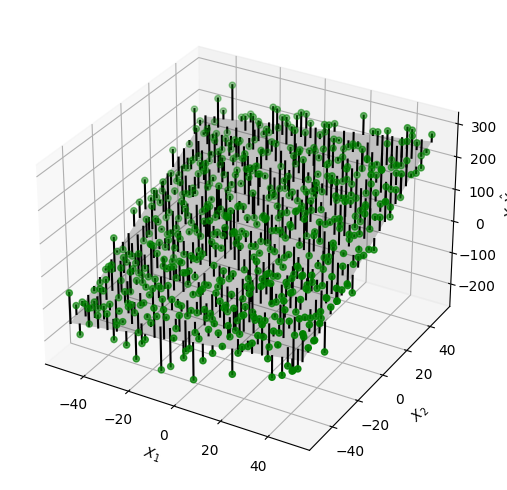

In [11]:
three_dee = plt.figure(figsize=(15, 5)).add_subplot(projection = '3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = statsmodel.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout();

## Predicting Returns with Multiple Linear Regression

In [12]:
ETF_TICKERS = ['IWM', 'IBLC', 'IRBO', 'IHAK', 'IDNA', 'IWFH', 'BMED', 'IFRA', 'IGF', 'EMIF', 'ICLN', 'IDRV', 'IVEG', 'CNYA'] # Enter the ETF ticker symbols here
ECON_TICKERS = ['VIXCLS', 'BAMLH0A0HYM2', 'T10YIE']
START_DATE = '2023-07-01'#sock data start date 
END_DATE = '2024-07-01' #sock data end date 

In [13]:
# getting ETF price data
etfPxList = yf.download(ETF_TICKERS, START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# finding log returns of ETF prices
etfLogRetList = np.log(etfPxList).diff()

[*********************100%***********************]  14 of 14 completed


In [14]:
# getting economic indicator data
econIndexList = pdr.DataReader(ECON_TICKERS, 'fred', START_DATE, END_DATE )
# variable names
ECON_NAMES = ['volatiliity_index', 'option_adjusted_spread', 'inflation_rate']
econIndexList.columns = ECON_NAMES

In [15]:
RESPONSE = 'IWM' # response variable
FEATURES = (ETF_TICKERS + ECON_NAMES)[1:] # explanatory variables
DATA = pd.concat([etfLogRetList, econIndexList], axis=1).dropna()

In [16]:
DATA.head()

,BMED,CNYA,EMIF,IBLC,ICLN,IDNA,IDRV,IFRA,IGF,IHAK,IRBO,IVEG,IWFH,IWM,volatiliity_index,option_adjusted_spread,inflation_rate
2023-07-05,-0.001345,-0.004248,-0.006770,0.007163,-0.015886,0.003860,0.005721,-0.008439,-0.006158,-0.004427,-0.013893,-0.012162,-0.010809,-0.010015,14.18,4.01,2.26
2023-07-06,-0.008642,-0.009065,-0.023369,-0.019085,-0.022900,-0.024703,-0.017911,-0.012923,-0.012862,-0.018175,-0.015941,-0.008934,-0.023005,-0.016280,15.44,4.10,2.27
2023-07-07,-0.004287,0.007361,0.019284,0.040649,0.011795,0.006691,0.025926,0.003376,0.005165,0.000541,0.009840,0.013141,0.008136,0.010504,14.83,4.08,2.27
2023-07-10,0.015088,0.005443,-0.004558,0.038471,0.013311,0.035832,0.013063,0.006461,-0.003440,0.018352,0.013072,-0.002666,0.018820,0.016963,15.07,4.13,2.25
2023-07-11,0.000854,0.005245,-0.003203,0.023829,0.003849,-0.005482,0.010604,0.008975,0.012202,0.007669,0.016475,0.013613,0.034480,0.010221,14.84,4.05,2.24


In [17]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2023-07-05 to 2024-06-28
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BMED                    248 non-null    float64
 1   CNYA                    248 non-null    float64
 2   EMIF                    248 non-null    float64
 3   IBLC                    248 non-null    float64
 4   ICLN                    248 non-null    float64
 5   IDNA                    248 non-null    float64
 6   IDRV                    248 non-null    float64
 7   IFRA                    248 non-null    float64
 8   IGF                     248 non-null    float64
 9   IHAK                    248 non-null    float64
 10  IRBO                    248 non-null    float64
 11  IVEG                    248 non-null    float64
 12  IWFH                    248 non-null    float64
 13  IWM                     248 non-null    float64
 14  volatiliity_index      

In [18]:
DATA = DATA.dropna() # drop nan values from any of the rows

In [19]:
DATA.loc[:, FEATURES] = scale(DATA.loc[:, FEATURES]) # standardizing indicators

In [21]:
DATA.head()

,BMED,CNYA,EMIF,IBLC,ICLN,IDNA,IDRV,IFRA,IGF,IHAK,IRBO,IVEG,IWFH,IWM,volatiliity_index,option_adjusted_spread,inflation_rate
2023-07-05,-0.165341,-0.344221,-0.640474,0.136609,-0.892461,0.239361,0.438502,-0.908387,-0.743542,-0.446442,-1.146778,-1.359182,-0.794130,-0.010015,-0.168420,1.005573,-0.716046
2023-07-06,-1.007450,-0.780538,-2.219679,-0.532572,-1.319933,-1.553635,-1.020350,-1.373061,-1.530868,-1.631453,-1.315445,-0.994135,-1.687682,-0.016280,0.445244,1.230692,-0.571437
2023-07-07,-0.504889,0.707178,1.838449,0.990307,0.794748,0.417062,1.685853,0.315876,0.586152,-0.018297,0.807710,1.502591,0.593972,0.010504,0.148153,1.180665,-0.571437
2023-07-10,1.731092,0.533463,-0.429964,0.934775,0.887195,2.246291,0.891777,0.635499,-0.424373,1.516804,1.073864,-0.285154,1.376743,0.016963,0.265041,1.305732,-0.860654
2023-07-11,0.088441,0.515504,-0.301056,0.561506,0.310475,-0.347062,0.739982,0.896049,1.412579,0.596069,1.354090,1.555961,2.524199,0.010221,0.153023,1.105626,-1.005263


In [22]:
# Function to remove outlying values that lie > 3 standard deviations away from the mean
def remove_outliers(df, columns, n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean() # mean
        sd = df[col].std() # standard deviation
        
        df = df[(df[col] <= mean+(n_std*sd))] # criteria
        
    return df

In [23]:
DATA1 = remove_outliers(DATA, FEATURES, 3)
DATA1.info()

Working on column: IBLC
Working on column: IRBO
Working on column: IHAK
Working on column: IDNA
Working on column: IWFH
Working on column: BMED
Working on column: IFRA
Working on column: IGF
Working on column: EMIF
Working on column: ICLN
Working on column: IDRV
Working on column: IVEG
Working on column: CNYA
Working on column: volatiliity_index
Working on column: option_adjusted_spread
Working on column: inflation_rate
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2023-07-05 to 2024-06-28
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BMED                    238 non-null    float64
 1   CNYA                    238 non-null    float64
 2   EMIF                    238 non-null    float64
 3   IBLC                    238 non-null    float64
 4   ICLN                    238 non-null    float64
 5   IDNA                    238 non-null    float64
 6   IDRV                   

In [24]:
X_train, X_test, y_train, y_test = train_test_split(DATA1.loc[:, FEATURES], DATA1.loc[:, RESPONSE], test_size=0.2, random_state=0)

In [25]:
from sklearn.ensemble import RandomForestRegressor # importing the random forest module

rf_model = RandomForestRegressor(random_state=0) # define the random forest model

rf_model.fit(X_train, y_train) # fit the random forest model

importances = rf_model.feature_importances_ # get importance

indices = np.argsort(importances) # sort the features' index by their importance scores

Text(0.5, 0, 'Importance Score')

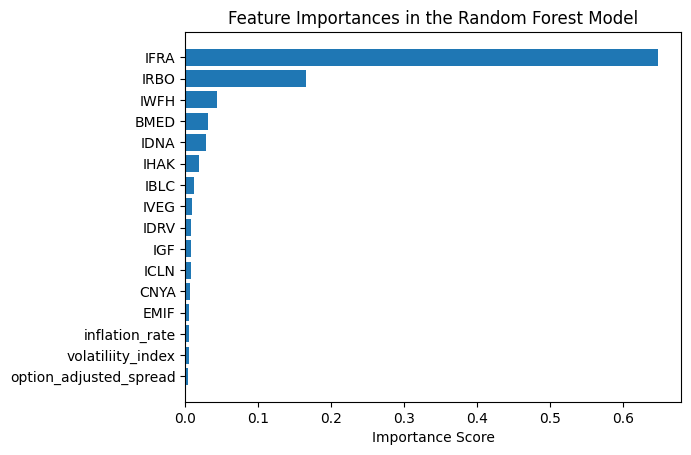

In [26]:
# Visualize and rank feature importance scores
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Importance Score')

Since only IFRA and IRBO log returns have importance scores >= 0.05, we will keep these 2 features and drop the remaining features due to insignificance.

In [29]:
FEATURES_TO_DROP=[FEATURES[i] for i in indices[importances[indices] < 0.05]] # features with < 0.05 importance scores
DATA1 = DATA1.drop(columns=FEATURES_TO_DROP) # drop feature in the original data set
X_train = X_train.drop(columns = FEATURES_TO_DROP) # drop feature in the training data set
X_test = X_test.drop(columns= FEATURES_TO_DROP) # drop feature in the testing data set
FEATURES = [f for f in FEATURES if f not in FEATURES_TO_DROP] # remove features with < 0.05 importance scores

Text(0.5, 1.0, 'Correlations Between Features')

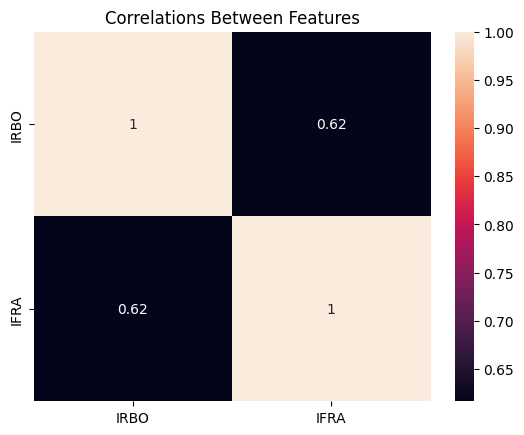

In [31]:
# plotting a correaltion heatmap to identify correlations b/w features
sns.heatmap(DATA1.loc[:, FEATURES].corr(), annot=True)
plt.title("Correlations Between Features")

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'Features': FEATURES, 'VIF': [variance_inflation_factor(DATA1.loc[:, FEATURES].values, i) for i in range(len(FEATURES))]})

,Features,VIF
0,IRBO,1.615135
1,IFRA,1.615135


In [33]:
FEATURES_TO_DROP=[FEATURES[i] for i in range(len(FEATURES)) if variance_inflation_factor(DATA1.loc[:, FEATURES].values, i) >= 5] # features with > 5 VIF
DATA1 = DATA1.drop(columns=FEATURES_TO_DROP) # drop feature in the original data set
X_train = X_train.drop(columns = FEATURES_TO_DROP) # drop feature in the training data set
X_test = X_test.drop(columns= FEATURES_TO_DROP) # drop feature in the testing data set
FEATURES = [f for f in FEATURES if f not in FEATURES_TO_DROP] # remove features with < 0.05 importance scores

### Multiple Linear Regression

<i> Visualizing 3D scatterplot before model fitting </i>

Text(0.5, 0.92, 'IFRA vs IRBO vs IWM Log Returns Before Fit')

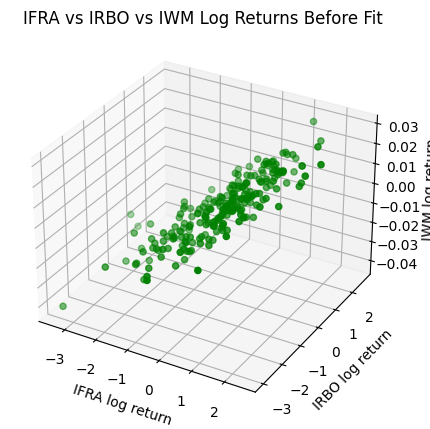

In [35]:
## Plot scatterplot before model fitting
three_dee = plt.figure(figsize=(10, 5)).add_subplot(projection = '3d')
three_dee.scatter(DATA1.IFRA, DATA1.IRBO, DATA1.IWM, c='g')
three_dee.set_xlabel("IFRA log return")
three_dee.set_ylabel("IRBO log return")
three_dee.set_zlabel("IWM log return")
three_dee.set_title('IFRA vs IRBO vs IWM Log Returns Before Fit')

Our model has two independent variables, so its regression formula looks something like this:

IWM log return = $\beta_0$ + $\beta_1$ * (IFRA log return) + $\beta_2$ * (IRBO log return) + $\epsilon$
<br><br>
We will get the model summary with statsmodels and estimate a multiple linear regression with sklearn.

In [43]:
linear_model = LinearRegression()

#fit regression model
linear_model = linear_model.fit(X_train, y_train)

#get estimated intercepts and coefficients
print('intercept: ', linear_model.intercept_)
print('coefficients: ', linear_model.coef_)

intercept:  0.00035659074546376266
coefficients:  [0.0050221  0.00729194]


In [51]:
X_ols = sm.add_constant(X_train)
statsmodel = sm.OLS(y_train, X_ols).fit()
print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    IWM   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     670.0
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           5.32e-86
Time:                        14:41:15   Log-Likelihood:                 778.84
No. Observations:                 190   AIC:                            -1552.
Df Residuals:                     187   BIC:                            -1542.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.211      0.2

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model predictions
y_test_pred_multi = linear_model.predict(X_test)
r2_multi = r2_score(y_test, y_test_pred_multi)
adj_r2_multi = 1 - (1-r2_multi) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae_multi = mean_absolute_error(y_test, y_test_pred_multi)
rmse_multi = mean_squared_error(y_test, y_test_pred_multi, squared=False)

# Print model performance metrics
print('R-squared: ', r2_multi)
print('Adjusted R-squared: ', adj_r2_multi)
print('MAE: ', mae_multi)
print('RMSE: ', rmse_multi)

R-squared:  0.8312529298171869
Adjusted R-squared:  0.8237530600312841
MAE:  0.003224804687064483
RMSE:  0.003996755558361542


## Lasso Regression

We need to tune the regularization parameter, $\lambda$. To do this, we use the grid search method to test a set of $\lambda$ values. Here, we allow the machine to select the value set for us. We may also pre-specify a set of values, for example, from 0.0001 to 10000, but may run the risk of overfitting.

In [89]:
from sklearn.linear_model import LassoCV
# initiate 5-Fold cross validation 
lasso_model = LassoCV(cv=5) # uses scoring='r2'by default
# fit the model with the best alpha
lasso_model = lasso_model.fit(X_train, y_train)
print('The optimal lambda is:', lasso_model.alpha_)

The optimal lambda is: 9.64110264975975e-06


In [90]:
# Model predictions
y_test_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_test_pred_lasso)
adj_r2_lasso = 1 - (1-r2_lasso) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)

# Print model performance metrics
print('R-squared: ', r2_lasso)
print('Adjusted R-squared: ', adj_r2_lasso)
print('The MAE is: ', mae_lasso)
print('The RMSE is: ', rmse_lasso)

R-squared:  0.831368245725531
Adjusted R-squared:  0.8238735010911102
The MAE is:  0.0032236561640229936
The RMSE is:  0.0039953897027557505


## Ridge Regression

Here, the RidgeCV function finds the optimal $\lambda$ that maximizes the $R^2$ using 5-Fold cross validation. The will be the estimate for our cost function.<br>

In [92]:
from sklearn.linear_model import RidgeCV
# initiate the 5-Fold cross validation 
ridge_model = RidgeCV(cv=5, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(X_train, y_train)
print('The optimal lambda is:', ridge_model.alpha_)

The optimal lambda is: 1.0


In [93]:
# Model predictions
y_test_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
adj_r2_ridge = 1 - (1-r2_ridge) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)

# Print model performance metrics
print('R-squared: ', r2_ridge)
print('Adjusted R-squared: ', adj_r2_ridge)
print('The MAE is: ', mae_ridge)
print('The RMSE is: ', rmse_ridge)

R-squared:  0.8315585543671742
Adjusted R-squared:  0.8240722678946042
The MAE is:  0.003221761209827152
The RMSE is:  0.003993134576382803


## Elastic Net Regression

In [94]:
from sklearn.linear_model import ElasticNetCV
# initiate the 5-Fold cross validation 
elasticNet_model = ElasticNetCV(cv=5)
# fit the model with the best alpha
elasticNet_model = elasticNet_model.fit(X_train, y_train)
print('The optimal lambda is:', elasticNet_model.alpha_)
print('The optimal alpha is:', elasticNet_model.l1_ratio_)

The optimal lambda is: 1.92822052995195e-05
The optimal alpha is: 0.5


In [95]:
# Model predictions
y_test_pred_elasticNet = elasticNet_model.predict(X_test)
r2_elasticNet = r2_score(y_test, y_test_pred_elasticNet)
adj_r2_elasticNet = 1 - (1-r2_elasticNet) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae_elasticNet = mean_absolute_error(y_test, y_test_pred_elasticNet)
rmse_elasticNet = mean_squared_error(y_test, y_test_pred_elasticNet, squared=False)

# Print model performance metrics
print('R-squared: ', r2_elasticNet)
print('Adjusted R-squared: ', adj_r2_elasticNet)
print('The MAE is: ', mae_elasticNet)
print('The RMSE is: ', rmse_elasticNet)

R-squared:  0.8313688154997668
Adjusted R-squared:  0.8238740961886454
The MAE is:  0.003223650590012356
The RMSE is:  0.003995382952923705


In [96]:
# Defining model names and metrics
models = ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression']
R_squared = [r2_multi, r2_lasso, r2_ridge, r2_elasticNet]
Adj_R_squared = [adj_r2_multi, adj_r2_lasso, adj_r2_ridge, adj_r2_elasticNet]
MAE = [mae_multi, mae_lasso, mae_ridge, mae_elasticNet]
RMSE = [rmse_multi, rmse_lasso, rmse_ridge, rmse_elasticNet]

# Output model performance table
modelTable = pd.DataFrame({'Model':models, 'R-squared': R_squared, 'Adj R-squared':Adj_R_squared, 'MAE': MAE, 'RMSE':RMSE})
modelTable

,Model,R-squared,Adj R-squared,MAE,RMSE
0,Multiple Linear Regression,0.831253,0.823753,0.003225,0.003997
1,Lasso Regression,0.831368,0.823874,0.003224,0.003995
2,Ridge Regression,0.831559,0.824072,0.003222,0.003993
3,Elastic Net Regression,0.831369,0.823874,0.003224,0.003995


Amongst the four models, the Ridge Regression seem to yield the highest Adjusted $R^2$, the lowest MAE and RMSE, hence, it is resonable to chose this as our best model that uses IFRA and IRBO daily log returns to predict IWM daily log returns.<br><br>
Based on the estimated intercept and coeffieients, this prediction model is defiend as:<br>
Estimated IWM log return = 0.0004 + 0.005 * (IRBO log return) + 0.0073 * (IRBO log return)

In [98]:
print('intercept:', linear_model.intercept_)
print('coefficient:', linear_model.coef_)

intercept: 0.00035659074546376266
coefficient: [0.0050221  0.00729194]


## Logistic Regression (Classification)

In [99]:
# Copying exisitng dataset
DATA2 = DATA1.copy()

# converting IWM log returns into binary values 1's and 0's
DATA2.IWM = (DATA1.IWM > 0).astype(int)
y_test = (y_test > 0).astype(int)
y_train = (y_train > 0).astype(int)

In [100]:
DATA2.head()

,IFRA,IRBO,IWM
2023-07-05,-0.908387,-1.146778,0
2023-07-06,-1.373061,-1.315445,0
2023-07-07,0.315876,0.807710,1
2023-07-10,0.635499,1.073864,1
2023-07-11,0.896049,1.354090,1


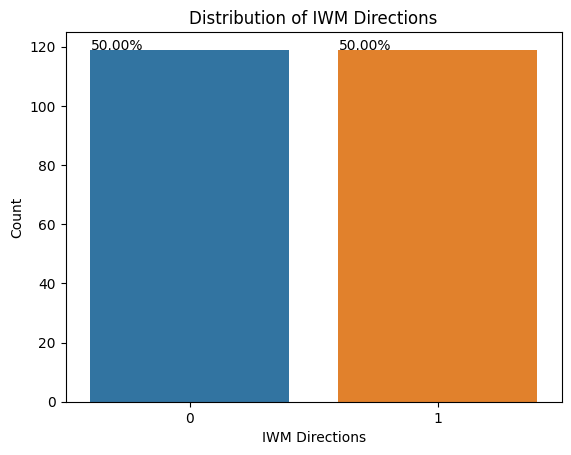

In [101]:
ax = sns.countplot(x = RESPONSE, data = DATA2)
plt.title('Distribution of '+ RESPONSE +' Directions')
plt.xlabel(RESPONSE + ' Directions')
plt.ylabel('Count')
total = len(DATA2.IWM)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

In [102]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(X_train, y_train)
lr_probs = logistic_model.predict_proba(X_test) # calculate the probabilities of the class for the test dataset using ‘predict_proba’
y_test_pred_logistic = logistic_model.predict(X_test) # predict the class labels using predict function for the test dataset

Text(0.5, 1.0, 'Confusion Matrix')

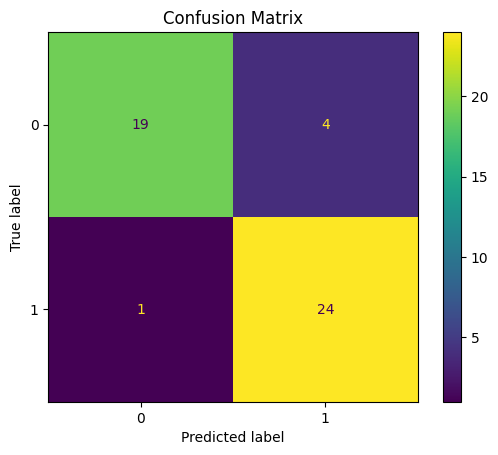

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_logistic = confusion_matrix(y_test, y_test_pred_logistic, labels=logistic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=logistic_model.classes_)
disp.plot()
plt.title("Confusion Matrix")

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_logistic))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.86      0.96      0.91        25

    accuracy                           0.90        48
   macro avg       0.90      0.89      0.89        48
weighted avg       0.90      0.90      0.90        48



In [105]:
print('training accuracy score:', logistic_model.score(X_train,y_train))
print('testing accuracy score:', logistic_model.score(X_test,y_test))

training accuracy score: 0.9
testing accuracy score: 0.8958333333333334


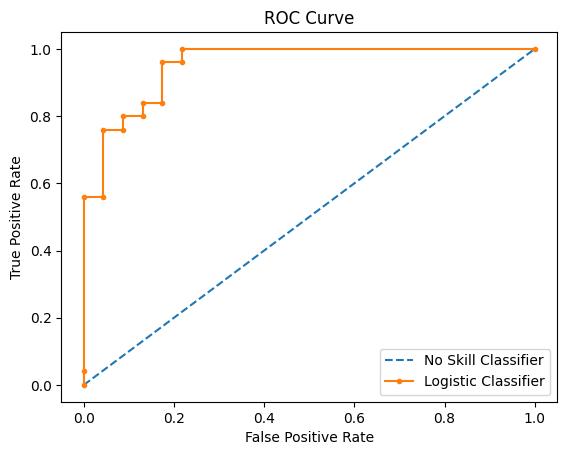

In [106]:
from sklearn.metrics import roc_curve
# generate a positive direction prediction (majority class)
ns_probs = [1 for _ in range(len(y_test))]
# keep probabilities for the positive direction only
lr_probs = lr_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Classifier')
# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [107]:
from sklearn.metrics import roc_auc_score
# calculate roc-auc scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill Classifier: ROC AUC=%.3f' % (ns_auc))
print('Logistic Classifier: ROC AUC=%.3f' % (lr_auc))

No Skill Classifier: ROC AUC=0.500
Logistic Classifier: ROC AUC=0.953


The logistic classifier has an AUC score of 0.953, which is substantially higher than that of the No-skill classifier with AUC of 0.5.<br>
This means that it has a much stronger discriminatory power than a 50-50 coin toss in identifying IWM’s upward and downward directions.<br>
We must compare this to the AUC scores of other models to decide the best classifier.